# เปรียบเทียบลักษณะการทำประโยชน์

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [42]:
# เปิดไฟล์ csv ที่ผ่านการทำความสะอาดข้อมูลจากไฟล์ก่อนหน้า
df_66 = pd.read_csv("target/data2566.csv")
df_65 = pd.read_csv("target/data2565.csv")
df_64 = pd.read_csv("target/data2564.csv")
df_63 = pd.read_csv("target/data2563.csv")

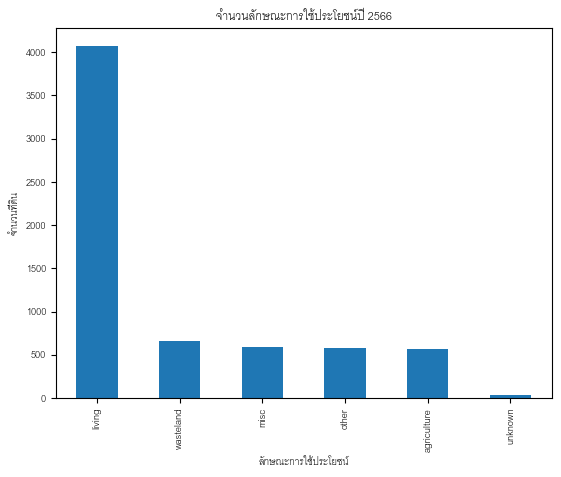

In [43]:
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "Cordia New"
plt.rcParams["font.serif"] = "Cordia New"

value_counts = df_66["type_of_usage"].value_counts()
value_counts.plot(kind="bar")
plt.title("จำนวนลักษณะการใช้ประโยชน์ปี 2566")
plt.xlabel("ลักษณะการใช้ประโยชน์")
plt.ylabel("จำนวนที่ดิน")
plt.show()

## เปรียบเทียบระหว่างปี 2565 และ 2566

เตรียมข้อมูลสำหรับเปรียบเทียบระหว่างปี 2565 และ 2566

In [44]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2565 เป็นพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์
df_wasteland2565 = df_65[df_65["type_of_usage"] == "wasteland"]
df_wasteland2565 = df_wasteland2565[['location_id', 'type_of_usage']] 
df_wasteland2565 = df_wasteland2565.set_index("location_id")

In [45]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2566 ทั้งหมดเพื่อดูลักษณะการใช้ประโยชน์
type_of_usage2566 = df_66
type_of_usage2566 = type_of_usage2566[['location_id', 'type_of_usage']]
type_of_usage2566 = type_of_usage2566.set_index("location_id")

In [46]:
# นำเลขที่รหัสที่ดินในปี 2565 และ 2566 มารวมเข้ากัน
diff_65_66 = pd.merge(df_wasteland2565, type_of_usage2566, left_index=True, right_index=True, how='inner')

#### พบว่าในปี 2565 มีพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ 482 พื้นที่ (นับเฉพาะพื้นที่ซึ่งในปี 2566 มีรหัสที่ดินเดียวกัน )

In [47]:
len(diff_65_66)

482

#### จากการทดลองด้านล่างจะพบว่าในปีจากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2565 เพิ่มขึ้นถึง 72 พื้นที่ในปี 2566 คิดเป็น 14.9378 เปอร์เซ็น

In [48]:
# จำนวนพื้นที่ทำเกษตร
len(diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"])

72

In [49]:
# เปอร์เซ็นความเปลี่ยนแปลง
len(diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"]) / len(diff_65_66) * 100

14.937759336099585

In [50]:
# นอกจากนี้จากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2566 ยังเปลี่ยนแปลงเป็นพื้นที่อยู่อาศัย 20 พื้นที่ คิดเป็น 4.1494 เปอร์เซ็น
# จำนวนพื้นที่อยู่อาศัย
# len(diff_65_66[diff_65_66["type_of_usage_y"] == "living"])  

In [51]:
# # เปอร์เซ็นความเปลี่ยนแปลง
# len(diff_65_66[diff_65_66["type_of_usage_y"] == "living"]) / len(diff_65_66) * 100

In [52]:
# diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"]
# df_66 = diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"].reset_index()
# df_66 = df_66.replace("agriculture", "ประกอบเกษตรกรรม")
# df_66 = df_66.replace("living", "อยู่อาศัย")
# df_66 = df_66.replace("other", "อื่น ๆ")
# df_66 = df_66.replace("wasteland", "ว่างเปล่า/ไม่ทำประโยชน์")
# df_66 = df_66.replace("misc", "ใช้ประโยชน์หลากหลาย")
# df_66 = df_66.replace("unknown", "ไม่ทราบลักษณะการใช้")

# df_66 = df_66.rename(columns={
#                     "location_id" : "รหัสที่ดิน",
#                     "type_of_usage_x": "ลักษณะการทำประโยชน์ 2565", 
#                     "type_of_usage_y": "ลักษณะการทำประโยชน์ 2566"
#                     }, errors="raise")
# df_66.head(50)

#### จากการเปลี่ยนแปลงทั้ง 72 พื้นที่มีดังนี้

In [53]:
diff_65_66 = diff_65_66.reset_index()

In [54]:
platation66 = df_66[df_66["location_id"].isin(diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"]["location_id"])].head(50)
platation66 = platation66.drop(["usage_living","usage_other", "usage_none", "usage_misc"],axis="columns")
platation66 = platation66 .replace("agriculture", "ประกอบเกษตรกรรม")
platation66 = platation66.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

In [55]:
platation66

,ที่,ประเภทที่ดิน,เลขที่เอกสารสิทธิ์,เลขที่ดิน,หน้าสำรวจ,รหัสแปลงที่ดิน,ไร่,งาน,ตร.ว.,ประกอบเกษตรกรรม (ตร.ว.),ลักษณะการทำประโยชน์
407,416,โฉนด,295,1056,619.0,01E040,0.0,0.0,65.5,65.5,ประกอบเกษตรกรรม
757,770,โฉนด,11260,805,2690.0,02D074,0.0,1.0,20.0,120.0,ประกอบเกษตรกรรม
758,771,โฉนด,11261,808,2691.0,02D075,0.0,1.0,20.4,120.4,ประกอบเกษตรกรรม
763,776,โฉนด,11266,806,2696.0,02D080,0.0,1.0,17.0,117.0,ประกอบเกษตรกรรม
764,777,โฉนด,11267,807,2697.0,02D081,0.0,1.0,18.6,118.6,ประกอบเกษตรกรรม
765,778,โฉนด,11268,631,2698.0,02D082,0.0,1.0,16.2,116.2,ประกอบเกษตรกรรม
766,779,โฉนด,11269,632,2699.0,02D083,0.0,1.0,16.0,116.0,ประกอบเกษตรกรรม
772,785,โฉนด,11275,642,2705.0,02D089,0.0,1.0,11.1,111.1,ประกอบเกษตรกรรม
773,786,โฉนด,11276,641,2706.0,02D090,0.0,1.0,12.5,112.5,ประกอบเกษตรกรรม
778,791,โฉนด,11051,600,2534.0,02E002,0.0,0.0,40.0,40.0,ประกอบเกษตรกรรม


#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [56]:
platation66.to_csv('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2566.csv', index=False)

####  สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [57]:
platation66.to_excel('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2566.xlsx', index=False)

In [58]:
# from matplotlib import pyplot as plt

# # สร้างกราฟ
# data = [ len(diff_65_66[diff_65_66["type_of_usage_y"] == "agriculture"]),
#          len(diff_65_66[diff_65_66["type_of_usage_y"] == "living"]), 
#          len(diff_65_66[diff_65_66["type_of_usage_y"] == "other"]), 
#          len(diff_65_66[diff_65_66["type_of_usage_y"] == "wasteland"]), 
#        ]
# labels = ['agriculture','living','other','still wasteland'] 

# plt.pie(data, labels=labels, autopct='%1.1f%%')
# plt.show()จากการเปลี่ยนแปลงทั้ง 63 พื้นที่มีดังนี้

# diff_64_65 = diff_64_65.reset_index()

# df_65[df_65["location_id"].isin(diff_64_65[diff_64_65["type_of_usage_y"] == "agriculture"]["location_id"])].head(50)

## เปรียบเทียบระหว่างปี 2564 และ 2565

In [59]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2564 เป็นพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์
df_wasteland2564 = df_64[df_64["type_of_usage"] == "wasteland"]
df_wasteland2564 = df_wasteland2564[['location_id', 'type_of_usage']] 
df_wasteland2564 = df_wasteland2564.set_index("location_id")

In [60]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2565 ทั้งหมดเพื่อดูลักษณะการใช้ประโยชน์
type_of_usage2565 = df_65
type_of_usage2565 = type_of_usage2565[['location_id', 'type_of_usage']]
type_of_usage2565 = type_of_usage2565.set_index("location_id")

In [61]:
diff_64_65 = pd.merge(df_wasteland2564, type_of_usage2565, left_index=True, right_index=True, how='inner')

#### พบว่าในปี 2564 มีพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ 597 พื้นที่ (นับเฉพาะพื้นที่ซึ่งในปี 2565 มีรหัสที่ดินเดียวกัน )

In [62]:
len(diff_64_65)

597

#### จากการทดลองด้านล่างจะพบว่าในปีจากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2564 เพิ่มขึ้นถึง 63 พื้นที่ในปี 2565 คิดเป็น 10.5528 เปอร์เซ็น

In [63]:
# จำนวนพื้นที่ทำเกษตร
len(diff_64_65[diff_64_65["type_of_usage_y"] == "agriculture"])

63

In [64]:
# เปอร์เซ็นความเปลี่ยนแปลง
len(diff_64_65[diff_64_65["type_of_usage_y"] == "agriculture"]) / len(diff_64_65) * 100

10.552763819095476

#### จากการเปลี่ยนแปลงทั้ง 63 พื้นที่มีดังนี้

In [65]:
diff_64_65 = diff_64_65.reset_index()

In [66]:
#### แปลงชื่อหลักและนำหลักที่ไม่จำเป็นออก เพื่อให้อ่านง่ายขึ้น
platation65 = df_65[df_65["location_id"].isin(diff_64_65[diff_64_65["type_of_usage_y"] == "agriculture"]["location_id"])].head(50)
platation65 = platation65.drop(["usage_living","usage_other", "usage_none", "usage_misc"],axis="columns")
platation65 = platation65 .replace("agriculture", "ประกอบเกษตรกรรม")
platation65 = platation65.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "parcel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

In [67]:
platation65

,ที่,ประเภทที่ดิน,เลขที่เอกสารสิทธิ์,เลขที่ดิน,หน้าสำรวจ,รหัสแปลงที่ดิน,ไร่,งาน,ตร.ว.,ประกอบเกษตรกรรม (ตร.ว.),ลักษณะการทำประโยชน์
147,148,โฉนด,131.0,2232,364,02L067,0,1,70.0,170.0,ประกอบเกษตรกรรม
246,247,โฉนด,232.0,1486,430,03H003,0,1,5.3,105.3,ประกอบเกษตรกรรม
423,424,โฉนด,405.0,477,702,05H025,0,0,62.7,62.7,ประกอบเกษตรกรรม
726,727,โฉนด,711.0,2303,814,06E010,2,0,99.1,899.1,ประกอบเกษตรกรรม
1121,1122,โฉนด,1110.0,2045,1319,05C019,0,0,76.5,76.5,ประกอบเกษตรกรรม
1290,1291,โฉนด,1309.0,1190,1528,03G027,1,2,4.9,589.5,ประกอบเกษตรกรรม
1394,1395,โฉนด,1598.0,1867,45,05A016,0,2,16.0,216.0,ประกอบเกษตรกรรม
1401,1402,โฉนด,1626.0,569,1682,05E032,0,3,44.2,344.2,ประกอบเกษตรกรรม
1488,1489,โฉนด,1816.0,2034,2,05C085,2,0,23.3,823.3,ประกอบเกษตรกรรม
1735,1736,โฉนด,2383.0,224,1806,05E072,0,3,21.3,321.3,ประกอบเกษตรกรรม


#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [68]:
platation65.to_csv('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2565.csv', index=False)

####  สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [69]:
platation65.to_excel('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2565.xlsx', index=False)

## เปรียบเทียบระหว่างปี 2563 และ 2564

In [70]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2563 เป็นพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์
df_wasteland2563 = df_63[df_63["type_of_usage"] == "wasteland"]
df_wasteland2563 = df_wasteland2563[['location_id', 'type_of_usage']] 
df_wasteland2563 = df_wasteland2563.set_index("location_id")

In [71]:
# เลือกเลขที่รหัสที่ดินที่ในปี 2564 ทั้งหมดเพื่อดูลักษณะการใช้ประโยชน์
type_of_usage2564 = df_64
type_of_usage2564 = type_of_usage2564[['location_id', 'type_of_usage']]
type_of_usage2564 = type_of_usage2564.set_index("location_id")

In [72]:
diff_63_64 = pd.merge(df_wasteland2563, type_of_usage2564, left_index=True, right_index=True, how='inner')

#### พบว่าในปี 2563 มีพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ 121 พื้นที่ (นับเฉพาะพื้นที่ซึ่งในปี 2564 มีรหัสที่ดินเดียวกัน )

In [73]:
len(diff_63_64)

121

#### จากการทดลองด้านล่างจะพบว่าในปีจากพื้นที่ว่างเปล่า หรือไม่ทำประโยชน์ในปี 2563 เพิ่มขึ้นถึง 14 พื้นที่ในปี 2564 คิดเป็น 11.5702 เปอร์เซ็น

In [74]:
# จำนวนพื้นที่ทำเกษตร
len(diff_63_64[diff_63_64["type_of_usage_y"] == "agriculture"])

14

In [75]:
# เปอร์เซ็นความเปลี่ยนแปลง
len(diff_63_64[diff_63_64["type_of_usage_y"] == "agriculture"]) / len(diff_63_64) * 100

11.570247933884298

#### จากการเปลี่ยนแปลงทั้ง 14 พื้นที่มีดังนี้

In [76]:
diff_63_64 = diff_63_64.reset_index()

In [77]:
#### แปลงชื่อหลักและนำหลักที่ไม่จำเป็นออก เพื่อให้อ่านง่ายขึ้น
platation64 = df_64[df_64["location_id"].isin(diff_63_64[diff_63_64["type_of_usage_y"] == "agriculture"]["location_id"])]
platation64 = platation64.drop(["usage_living","usage_other", "usage_none", "usage_misc"],axis="columns")
platation64 = platation64 .replace("agriculture", "ประกอบเกษตรกรรม")
platation64 = platation64.rename(columns={
                    "order": "ที่", 
                    "type": "ประเภทที่ดิน", 
                    "document_number": "เลขที่เอกสารสิทธิ์",
                    "pracel_number": "เลขที่ดิน",
                    "sub_district_no" : "หน้าสำรวจ",
                    "location_id" : "รหัสแปลงที่ดิน",
                    "rai" : "ไร่",
                    "ngan" : "งาน",
                    "tarang_wa" : "ตร.ว.",
                    "usage_agriculture" : "ประกอบเกษตรกรรม (ตร.ว.)",
                    "type_of_usage" : "ลักษณะการทำประโยชน์"
                    }, errors="raise")

In [78]:
platation64

,ที่,ประเภทที่ดิน,เลขที่เอกสารสิทธิ์,เลขที่ดิน,หน้าสำรวจ,รหัสแปลงที่ดิน,ไร่,งาน,ตร.ว.,ประกอบเกษตรกรรม (ตร.ว.),ลักษณะการทำประโยชน์
1501,1584,โฉนด,49940,910,3911.0,03A016/001,0.0,2.0,47.1,247.1,ประกอบเกษตรกรรม
1532,1615,โฉนด,1867,956,1521.0,03B004,3.0,0.0,51.9,1251.9,ประกอบเกษตรกรรม
1631,1714,โฉนด,10939,1083,2502.0,03D040,0.0,1.0,35.0,135.0,ประกอบเกษตรกรรม
1632,1715,โฉนด,10938,1082,2501.0,03D041,0.0,1.0,34.8,134.8,ประกอบเกษตรกรรม
1678,1761,โฉนด,98754,33,4947.0,03D080/001,0.0,0.0,59.1,59.1,ประกอบเกษตรกรรม
1782,1866,โฉนด,138161,28,6185.0,03E032/001,0.0,1.0,71.6,171.6,ประกอบเกษตรกรรม
1785,1869,โฉนด,138163,30,6187.0,03E032/004,0.0,0.0,85.8,85.8,ประกอบเกษตรกรรม
1787,1871,โฉนด,1120,1213,1599.0,03E034,0.0,0.0,75.0,75.0,ประกอบเกษตรกรรม
1873,1957,โฉนด,11121,1414,2581.0,03F045,0.0,0.0,53.7,53.7,ประกอบเกษตรกรรม
2012,2096,โฉนด,18840,1175,3041.0,03G015,0.0,1.0,0.0,100.0,ประกอบเกษตรกรรม


#### สามารถดาวน์โหลดไฟล์ csv (เฉพาะพื้นที่เกษตรกรรม) โดยการนำ '#' ออกและกดรันโปรแกรม

In [79]:
platation64.to_csv('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2564.csv', index=False)

####  สามารถดาวน์โหลดไฟล์ excel โดยการนำ '#' ออกและกดรันโปรแกรม

In [80]:
platation64.to_excel('../result/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์/พื้นที่ประกอบเกษตรกรรมจากพื้นที่ไม่ทำประโยชน์_2564.xlsx', index=False)